In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from support_nsys_plot import *
from plot_cuda import *
from plot_tf import *

In [2]:
_RUN_TYPE = "infer"
_FOLDER_NAME = "inf_b2048" # train, inf_b1, inf_b2048, inf_ait, onnx

_DATA_DIR = "/qfs/projects/pacer/proxytsprd/output/hipc23/profiles/"
_PLOT_DIR = "/qfs/projects/pacer/proxytsprd/plots/paper/hipc23/"

In [3]:
ng_suffix = "ng32"
mgpu_list = ["None"]
model_list = ["lstm", "cnn", "stgcng"]
framework_list = ["pt", "tf"]
app_list = ["grid"]
dtype_list = ["fp32", "fp64", "amp"]
infer_suffix = [""]
fig_size = (20, 8)

if _FOLDER_NAME in ["inf_b1"]:
    ng_suffix = "ng1"
    mgpu_list = ["None"]
elif _FOLDER_NAME == "inf_b2048":
    ng_suffix = "ng1"
elif _FOLDER_NAME == "inf_ait":
    ng_suffix = "ng1"
    model_list = ["cnn"]
    framework_list = ["pt"]
    dtype_list = ["fp16"]
    mgpu_list = ["None"]
    app_list = ["grid"]
    infer_suffix = ["infer_1", "infer_ait"]
    fig_size = (4, 6)
elif _FOLDER_NAME == "onnx":
    ng_suffix = "ng1"
    model_list = ["lstm", "cnn"]
    mgpu_list = ["None"]
    app_list = ["grid"]
    infer_suffix = ["infer_onnx"]
    fig_size = (16, 6)

In [4]:
_DATA_DIR = os.path.join(_DATA_DIR, _FOLDER_NAME)

In [5]:
p = ''
if (len(sys.argv) > 1):
    p = sys.argv[1]

# path_list = [item for item in path_tf if pathlib.Path(item).exists() is True and os.path.getsize(item) > 0]
path_list = find_pattern(
    app_list, model_list, framework_list, 
    mgpu_list, dtype_list, infer_suffix, 
    ng_suffix, _DATA_DIR, _FOLDER_NAME, "cudaapisum"
)
print(path_list)
df_cuda = main_cuda(path_list, _FOLDER_NAME)
# cudaplot(df_cuda, p, _PLOT_DIR, _FOLDER_NAME, app_list, fig_size)

# sys.exit(1)
# path_list = [item for item in path_tf if pathlib.Path(item).exists() is True and os.path.getsize(item) > 0]
path_list = find_pattern(
    app_list, model_list, framework_list, 
    mgpu_list, dtype_list, infer_suffix, 
    ng_suffix, _DATA_DIR, _FOLDER_NAME, "gpukernsum"
)
df_tf = main_tf(path_list, _FOLDER_NAME)
# tfplot(df_tf, p, _PLOT_DIR, _FOLDER_NAME, app_list, fig_size)

# plot_combined(df_cuda, df_tf)

[INFO] Number of files (grid, lstm, pt, None, fp32, ): 1
[INFO] Number of files (grid, lstm, pt, None, fp64, ): 1
[INFO] Number of files (grid, lstm, pt, None, amp, ): 1
[INFO] Number of files (grid, lstm, tf, None, fp32, ): 1
[INFO] Number of files (grid, lstm, tf, None, fp64, ): 1
[INFO] Number of files (grid, lstm, tf, None, amp, ): 1
[INFO] Number of files (grid, cnn, pt, None, fp32, ): 1
[INFO] Number of files (grid, cnn, pt, None, fp64, ): 1
[INFO] Number of files (grid, cnn, pt, None, amp, ): 1
[INFO] Number of files (grid, cnn, tf, None, fp32, ): 1
[INFO] Number of files (grid, cnn, tf, None, fp64, ): 1
[INFO] Number of files (grid, cnn, tf, None, amp, ): 1
[INFO] Number of files (grid, stgcng, pt, None, fp32, ): 1
[INFO] Number of files (grid, stgcng, pt, None, fp64, ): 1
[INFO] Number of files (grid, stgcng, pt, None, amp, ): 1
[INFO] Number of files (grid, stgcng, tf, None, fp32, ): 1
[INFO] Number of files (grid, stgcng, tf, None, fp64, ): 0
[INFO] Number of files (grid, st

    Time(%)  Total Time (ns)  \
3       4.1       1720580153   
10      0.8        354810799   
13      0.0         20319571   
17      0.0          4361220   
29      0.0          1345755   

                                                 Name  
3   void at::native::vectorized_elementwise_kernel...  
10  void at::native::vectorized_elementwise_kernel...  
13  void at::native::index_elementwise_kernel<(int...  
17  void <unnamed>::elementwise_kernel_with_index<...  
29  void at::native::vectorized_elementwise_kernel...  
['void at::native::vectorized_elementwise_kernel<(int)4, at::native::<unnamed>::launch_clamp_scalar(at::TensorIteratorBase &, c10::Scalar, c10::Scalar, at::native::detail::ClampLimits)::[lambda() (instance 1)]::operator ()() const::[lambda() (instance 12)]::operator ()() const::[lambda(double) (instance 1)], at::detail::Array<char *, (int)2>>(int, T2, T3)', 'void at::native::vectorized_elementwise_kernel<(int)4, at::native::FillFunctor<double>, at::detail::Array<char

In [6]:
df_tf

,LSTM_PT_FP32_None,LSTM_PT_FP64_None,LSTM_PT_AMP_None,LSTM_TF_FP32_None,LSTM_TF_FP64_None,LSTM_TF_AMP_None,CNN_PT_FP32_None,CNN_PT_FP64_None,CNN_PT_AMP_None,CNN_TF_FP32_None,CNN_TF_FP64_None,CNN_TF_AMP_None,STGCN_PT_FP32_None,STGCN_PT_FP64_None,STGCN_PT_AMP_None,STGCN_TF_FP32_None
Name,,,,,,,,,,,,,,,,
hgemm,NaN,NaN,21.3,NaN,NaN,43.6,NaN,NaN,21.3,NaN,NaN,22.3,NaN,NaN,7.9,NaN
sgemm,19.3,NaN,NaN,55.7,NaN,NaN,68.1,NaN,NaN,54.5,NaN,NaN,17.8,NaN,NaN,6.9
dgemm,NaN,58.5,NaN,NaN,45.6,NaN,NaN,84.6,NaN,NaN,59.7,NaN,NaN,49.6,NaN,NaN
igemm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1,NaN,NaN,4.8
rnn,64.8,28.5,29.4,34.6,44.1,41.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arithmetic,7.8,6.7,15.3,1.4,1.8,5.8,22.5,14.0,44.3,12.9,12.5,31.2,16.1,7.1,20.7,23.8
mem,8.1,6.2,33.5,NaN,NaN,NaN,2.4,1.1,20.4,NaN,NaN,NaN,16.0,8.8,24.9,NaN
activation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.1,6.4,NaN,NaN,NaN,8.0
bias,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.7,9.7,NaN,NaN,NaN,NaN,5.0


In [12]:
if _FOLDER_NAME == "inf_b2048":
    gemm_cols = ["sgemm", "dgemm", "hgemm", "igemm"]
    cuda_indx = ["xfer", "mem", "event", "stream", "mod", "exec"]
    tf_indx = ["data", "gemm", "math", "rnn"]
else:
    gemm_cols = ["sgemm", "dgemm", "cgemm", "gemv"]
    cuda_indx = ["xfer", "mem", "event", "stream", "mod", "exec", "dev"]
    tf_indx = ["gemm", "rnn", "norm", "bias", "mem", "reduce", "transform", "elem", "other"]

math_cols = ["arithmetic", "bias", "activation", "norm"]
data_cols = ["mem", "transform", "elem"]
conv_cols = ["conv", "bias", "activation"]

df_tf.loc["gemm"] = df_tf.loc[gemm_cols].sum(axis=0)
df_tf.loc["math"] = df_tf.loc[math_cols].sum(axis=0)
df_tf.loc["data"] = df_tf.loc[data_cols].sum(axis=0)
# df_tf.loc["convolution"] = df_tf.loc[conv_cols].sum(axis=0)
df_tf[df_tf < 1] = np.nan
# print(df_tf)
# print(df_cuda, df_tf)

melted_tf = pd.melt(df_tf.reset_index(), id_vars=["Name"])
melted_tf["model"] = melted_tf["variable"].str.split("_", expand=True)[0]
melted_tf["run_type"] = "tf"

melted_cuda = pd.melt(df_cuda.reset_index(), id_vars=["Name"])
melted_cuda["model"] = melted_cuda["variable"].str.split("_", expand=True)[0]
melted_cuda["run_type"] = "cuda"

melted_df = pd.concat([melted_cuda, melted_tf]).reset_index(drop=True)
melted_df

,Name,variable,value,model,run_type
0,xfer,LSTM_PT_FP32_None,3.9,LSTM,cuda
1,mem,LSTM_PT_FP32_None,22.2,LSTM,cuda
2,event,LSTM_PT_FP32_None,NaN,LSTM,cuda
3,stream,LSTM_PT_FP32_None,56.5,LSTM,cuda
4,mod,LSTM_PT_FP32_None,10.5,LSTM,cuda
...,...,...,...,...,...
395,other,STGCN_TF_FP32_None,NaN,STGCN,tf
396,gemm,STGCN_TF_FP32_None,11.7,STGCN,tf
397,math,STGCN_TF_FP32_None,36.8,STGCN,tf
398,data,STGCN_TF_FP32_None,48.8,STGCN,tf


/people/jain432/.conda/envs/suf_py39/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)
/people/jain432/.conda/envs/suf_py39/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


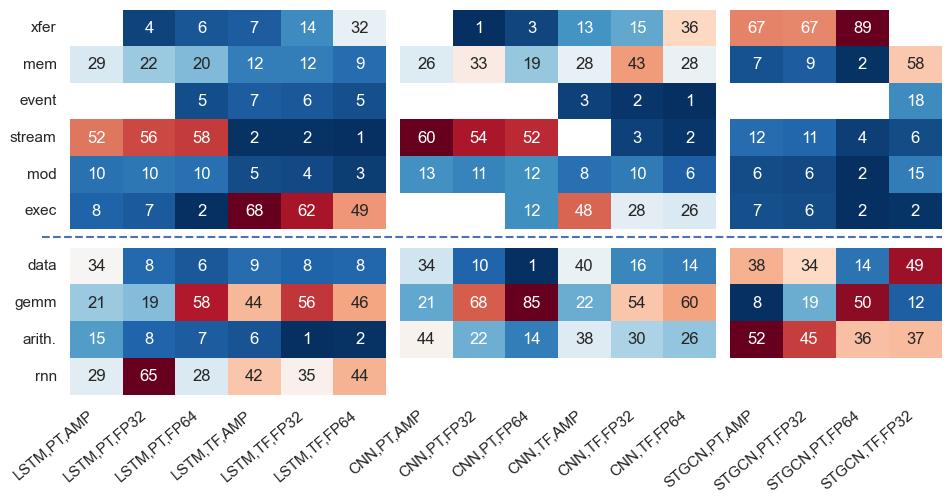

In [24]:
import matplotlib as mpl

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    indx_values = d.index.values
    if "dev" in indx_values:
        index = cuda_indx
    elif "gemm" in indx_values:
        index = tf_indx
    d = d.loc[index]
    
    ax = sns.heatmap(d, **kwargs)
    xticks = [','.join(c.split('_')[:3]) for c in d.columns]
    ax.set_xticklabels(xticks, rotation=40, ha='right')
#     ax.set_yticklabels(, rotation=0)
    ax.tick_params(left=False)

col_order = [""]
    
sns.set_theme(style="whitegrid")
fg = sns.FacetGrid(melted_df, row="run_type", col='model', 
                   aspect=1.5, height=2.5, sharex="col", sharey="row",
                   gridspec_kws={"wspace":0.05, "hspace":0.1, "height_ratios":[1, 0.67], "width_ratios":[1, 1, 0.67]}, 
                   margin_titles=False
                )
fg.map_dataframe(
    draw_heatmap, 'variable', 'Name', 'value', 
    cbar=False, square=False, annot=True, fmt=".0f", cmap='RdBu_r'
)
fg.set(facecolor="white", ylabel="", xlabel="")
fg.set_titles("")
bottom = 0.425
fg.fig.add_artist(mpl.lines.Line2D([0.1, 0.9], [bottom, bottom], linestyle='--'), )

In [ ]:
df_tf.reset_index()